In [1]:
!pip install kaggle
!pip install autoviz
!pip install -U feature-engine
!pip install feature_engine

# **Pre Mid-Term EDA**

In [2]:
from google.colab import drive
from scipy.stats import zscore, boxcox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to the folder you want to mount
drive_path = "/content/drive"
data_path = os.path.join(drive_path, "My Drive/dsa_project")

drive.mount(drive_path)
os.listdir(data_path)

TGT = "TARGET"

Mounted at /content/drive


**Question 1:** SK_ID_CURR Analysis:Get the count of unique values of SK_ID_CURR in file application_train.csv and compare this count to the number of rows in application_train.csv. Compare this with the total row count. Investigate if SK_ID_CURR serves as the table's primary key.?

**Analysis:**

Since the number of rows is same as number of unique values of SK_ID_CURR i.e. 307511, we can confirm that SK_ID_CURR is the primary id.

In [3]:
app_train = pd.read_csv(os.path.join(data_path, "application_train.csv"))
print(f"app_train.shape: {app_train.shape[0]} | len(app_train['SK_ID_CURR'].unique()): {len(app_train['SK_ID_CURR'].unique())}")

app_train.shape: 307511 | len(app_train['SK_ID_CURR'].unique()): 307511


**Question 2:** TARGET Column Analysis: Identify and quantify the unique values within the TARGET column. Assess the dataset's balance by evaluating the proportions of each target value.

**Analysis:**

There is a clear imbalance in the Target Variables as evident by the percentage of each unique value.

In [4]:
print(app_train[TGT].value_counts())
print(app_train[TGT].value_counts(normalize=True))

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [5]:
all_num_cols = app_train.select_dtypes(include=['number']).columns.tolist()

There is an imbalance in the TARGET values with 0 being 91% of the data.

In [6]:
null_df = list()

for c in all_num_cols:
  _miss_count = len(app_train[app_train[c].isnull()])
  _miss_pct = round(_miss_count/len(app_train), 2) * 100

  null_df.append({"col": c, "miss": _miss_count, "miss_pct": _miss_pct})

null_df = pd.DataFrame(null_df).sort_values("miss").reset_index(drop=True)
null_df = null_df[null_df["col"].isin([c for c in null_df["col"].tolist() if "FLAG" not in c.upper()])]
null_df.head(25)

,col,miss,miss_pct
0,SK_ID_CURR,0,0.0
1,REG_CITY_NOT_WORK_CITY,0,0.0
22,REG_CITY_NOT_LIVE_CITY,0,0.0
23,LIVE_REGION_NOT_WORK_REGION,0,0.0
24,LIVE_CITY_NOT_WORK_CITY,0,0.0
25,REG_REGION_NOT_LIVE_REGION,0,0.0
26,AMT_CREDIT,0,0.0
27,REGION_POPULATION_RELATIVE,0,0.0
28,DAYS_BIRTH,0,0.0
29,DAYS_EMPLOYED,0,0.0


In [7]:
selected_num_col = list()
selected_num_col.append('TARGET')
selected_num_col.append("CNT_CHILDREN")
selected_num_col.append("AMT_INCOME_TOTAL")
selected_num_col.append("AMT_CREDIT")
selected_num_col.append("AMT_ANNUITY")
selected_num_col.append("REGION_POPULATION_RELATIVE")
selected_num_col.append("DAYS_BIRTH")
selected_num_col.append("DAYS_EMPLOYED")
selected_num_col.append("DAYS_REGISTRATION")
selected_num_col.append("DAYS_ID_PUBLISH")
selected_num_col.append("HOUR_APPR_PROCESS_START")

# Not sure if these columns should be considered numerical or categorical
# selected_num_col.append("REGION_RATING_CLIENT")
# selected_num_col.append("REG_REGION_NOT_WORK_REGION")

# Too many missing values
# selected_num_col.append('YEARS_BUILD_AVG')
# selected_num_col.append('DAYS_LAST_PHONE_CHANGE')
# selected_num_col.append('AMT_REQ_CREDIT_BUREAU_YEAR')
# selected_num_col.append('OWN_CAR_AGE')
# selected_num_col.append('AMT_GOODS_PRICE')

null_df[null_df["col"].isin(set(selected_num_col))]

,col,miss,miss_pct
26,AMT_CREDIT,0,0.0
27,REGION_POPULATION_RELATIVE,0,0.0
28,DAYS_BIRTH,0,0.0
29,DAYS_EMPLOYED,0,0.0
30,DAYS_REGISTRATION,0,0.0
31,DAYS_ID_PUBLISH,0,0.0
35,AMT_INCOME_TOTAL,0,0.0
40,TARGET,0,0.0
42,HOUR_APPR_PROCESS_START,0,0.0
44,CNT_CHILDREN,0,0.0


In [8]:
app_train[selected_num_col].dtypes

TARGET                          int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
HOUR_APPR_PROCESS_START         int64
dtype: object

**Question 3:** Correlation Analysis: Generate a Pearson correlation matrix and heatmap (for any 10 numeric variables of choice) on application_tain.csv. Write code to list the top 5 features correlated with the TARGET column.


<Axes: >

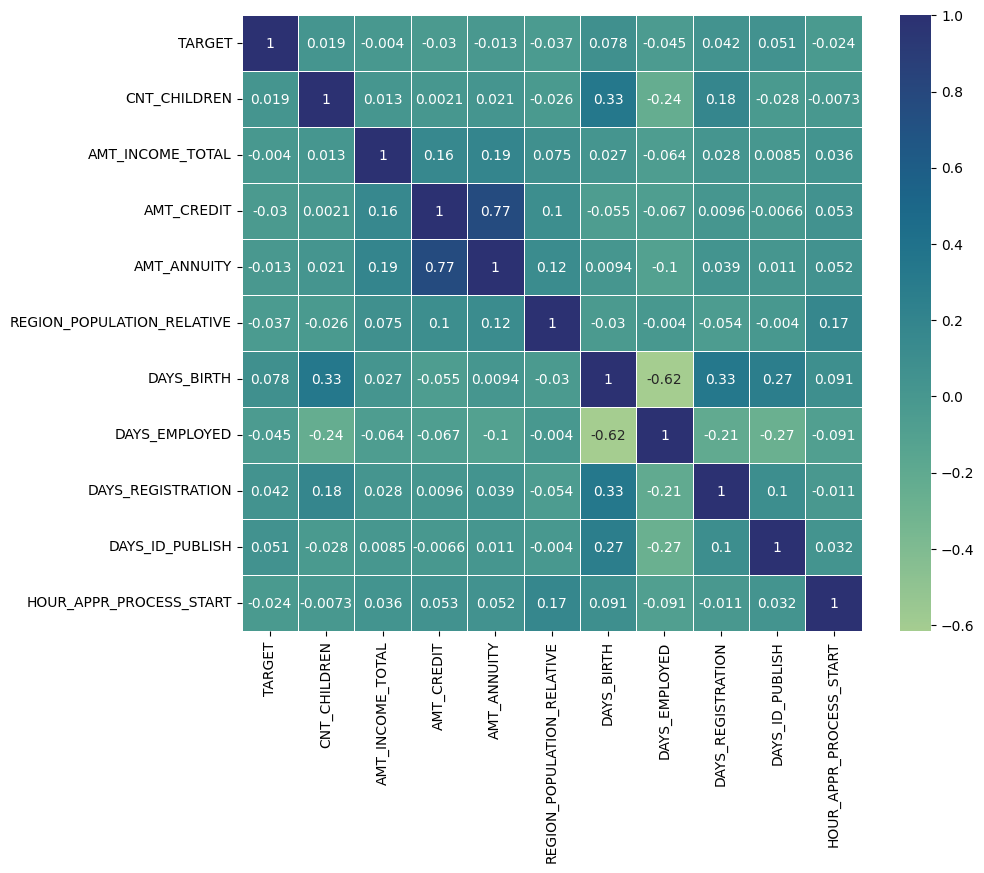

In [9]:
corr = app_train[selected_num_col].corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'crest', linewidth = 0.5)

In [10]:
corr_vars = corr[TGT].sort_values(ascending = False)
corr_vars = corr_vars.abs()
corr_vars = corr_vars.reset_index().rename(columns={"index": "vars"})
corr_vars = corr_vars[(corr_vars["vars"] != TGT)]

top5_corr_vars = corr_vars.sort_values(TGT, ascending=False).head(5)["vars"].tolist()
corr_vars.sort_values(TGT, ascending=False).head(5)[["vars", "TARGET"]]

,vars,TARGET
1,DAYS_BIRTH,0.078239
2,DAYS_ID_PUBLISH,0.051457
10,DAYS_EMPLOYED,0.044932
3,DAYS_REGISTRATION,0.041975
9,REGION_POPULATION_RELATIVE,0.037227


**Question 4:** Histogram: Generate histograms for any five numerical features in application_train.csv, and comment on whether they seem Gaussian, or have severe skews. Visualize the relationship between each of these numeric variables and the target variable.

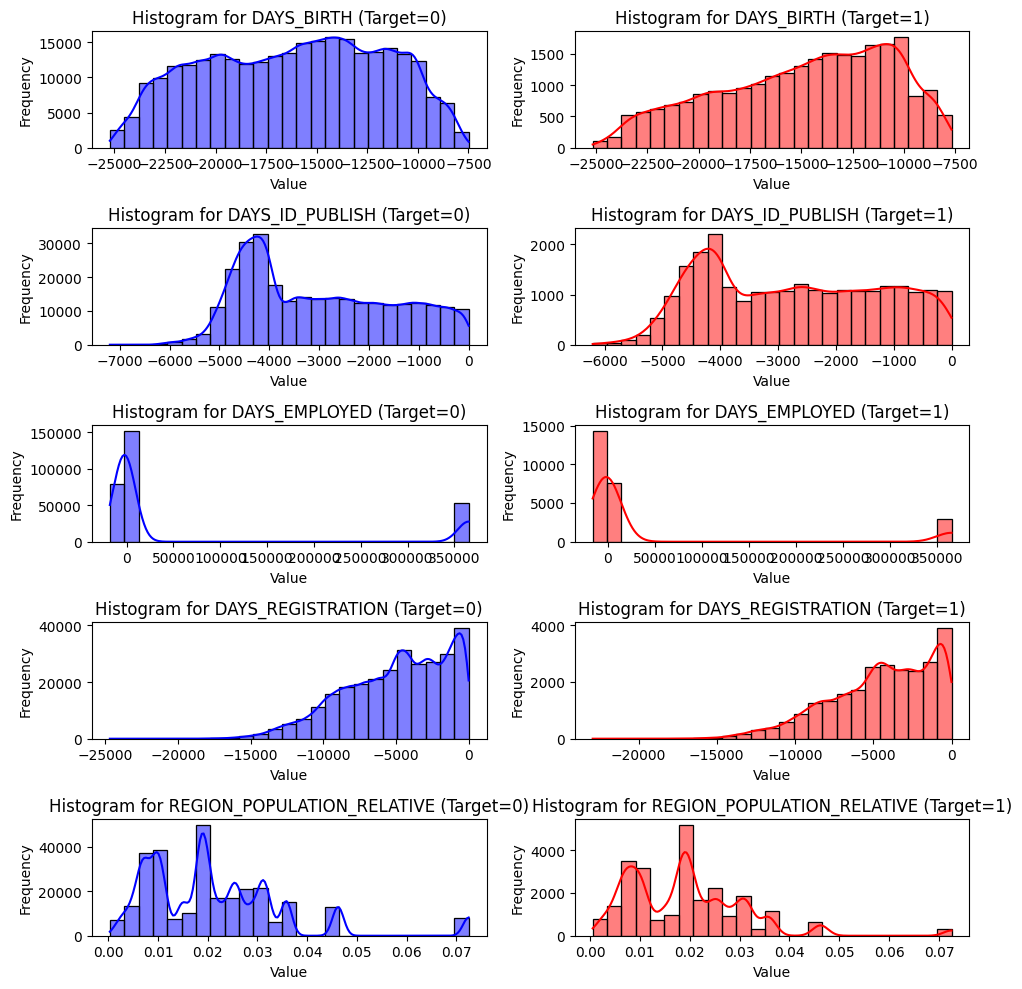

In [11]:
plt.figure(figsize = (10,10))

app_train0 = app_train[(app_train[TGT] == 0)]
app_train1 = app_train[(app_train[TGT] == 1)]

for i, _v in enumerate(top5_corr_vars):

    plt.subplot(len(top5_corr_vars), 2, 2*i+1)
    sns.histplot(x=app_train0[_v], bins=25, kde=True, color="blue")
    plt.title(f'Histogram for {_v} (Target=0)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(len(top5_corr_vars), 2, 2*i+2)
    sns.histplot(x=app_train1[_v], bins=25, kde=True, color="red")
    plt.title(f'Histogram for {_v} (Target=1)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

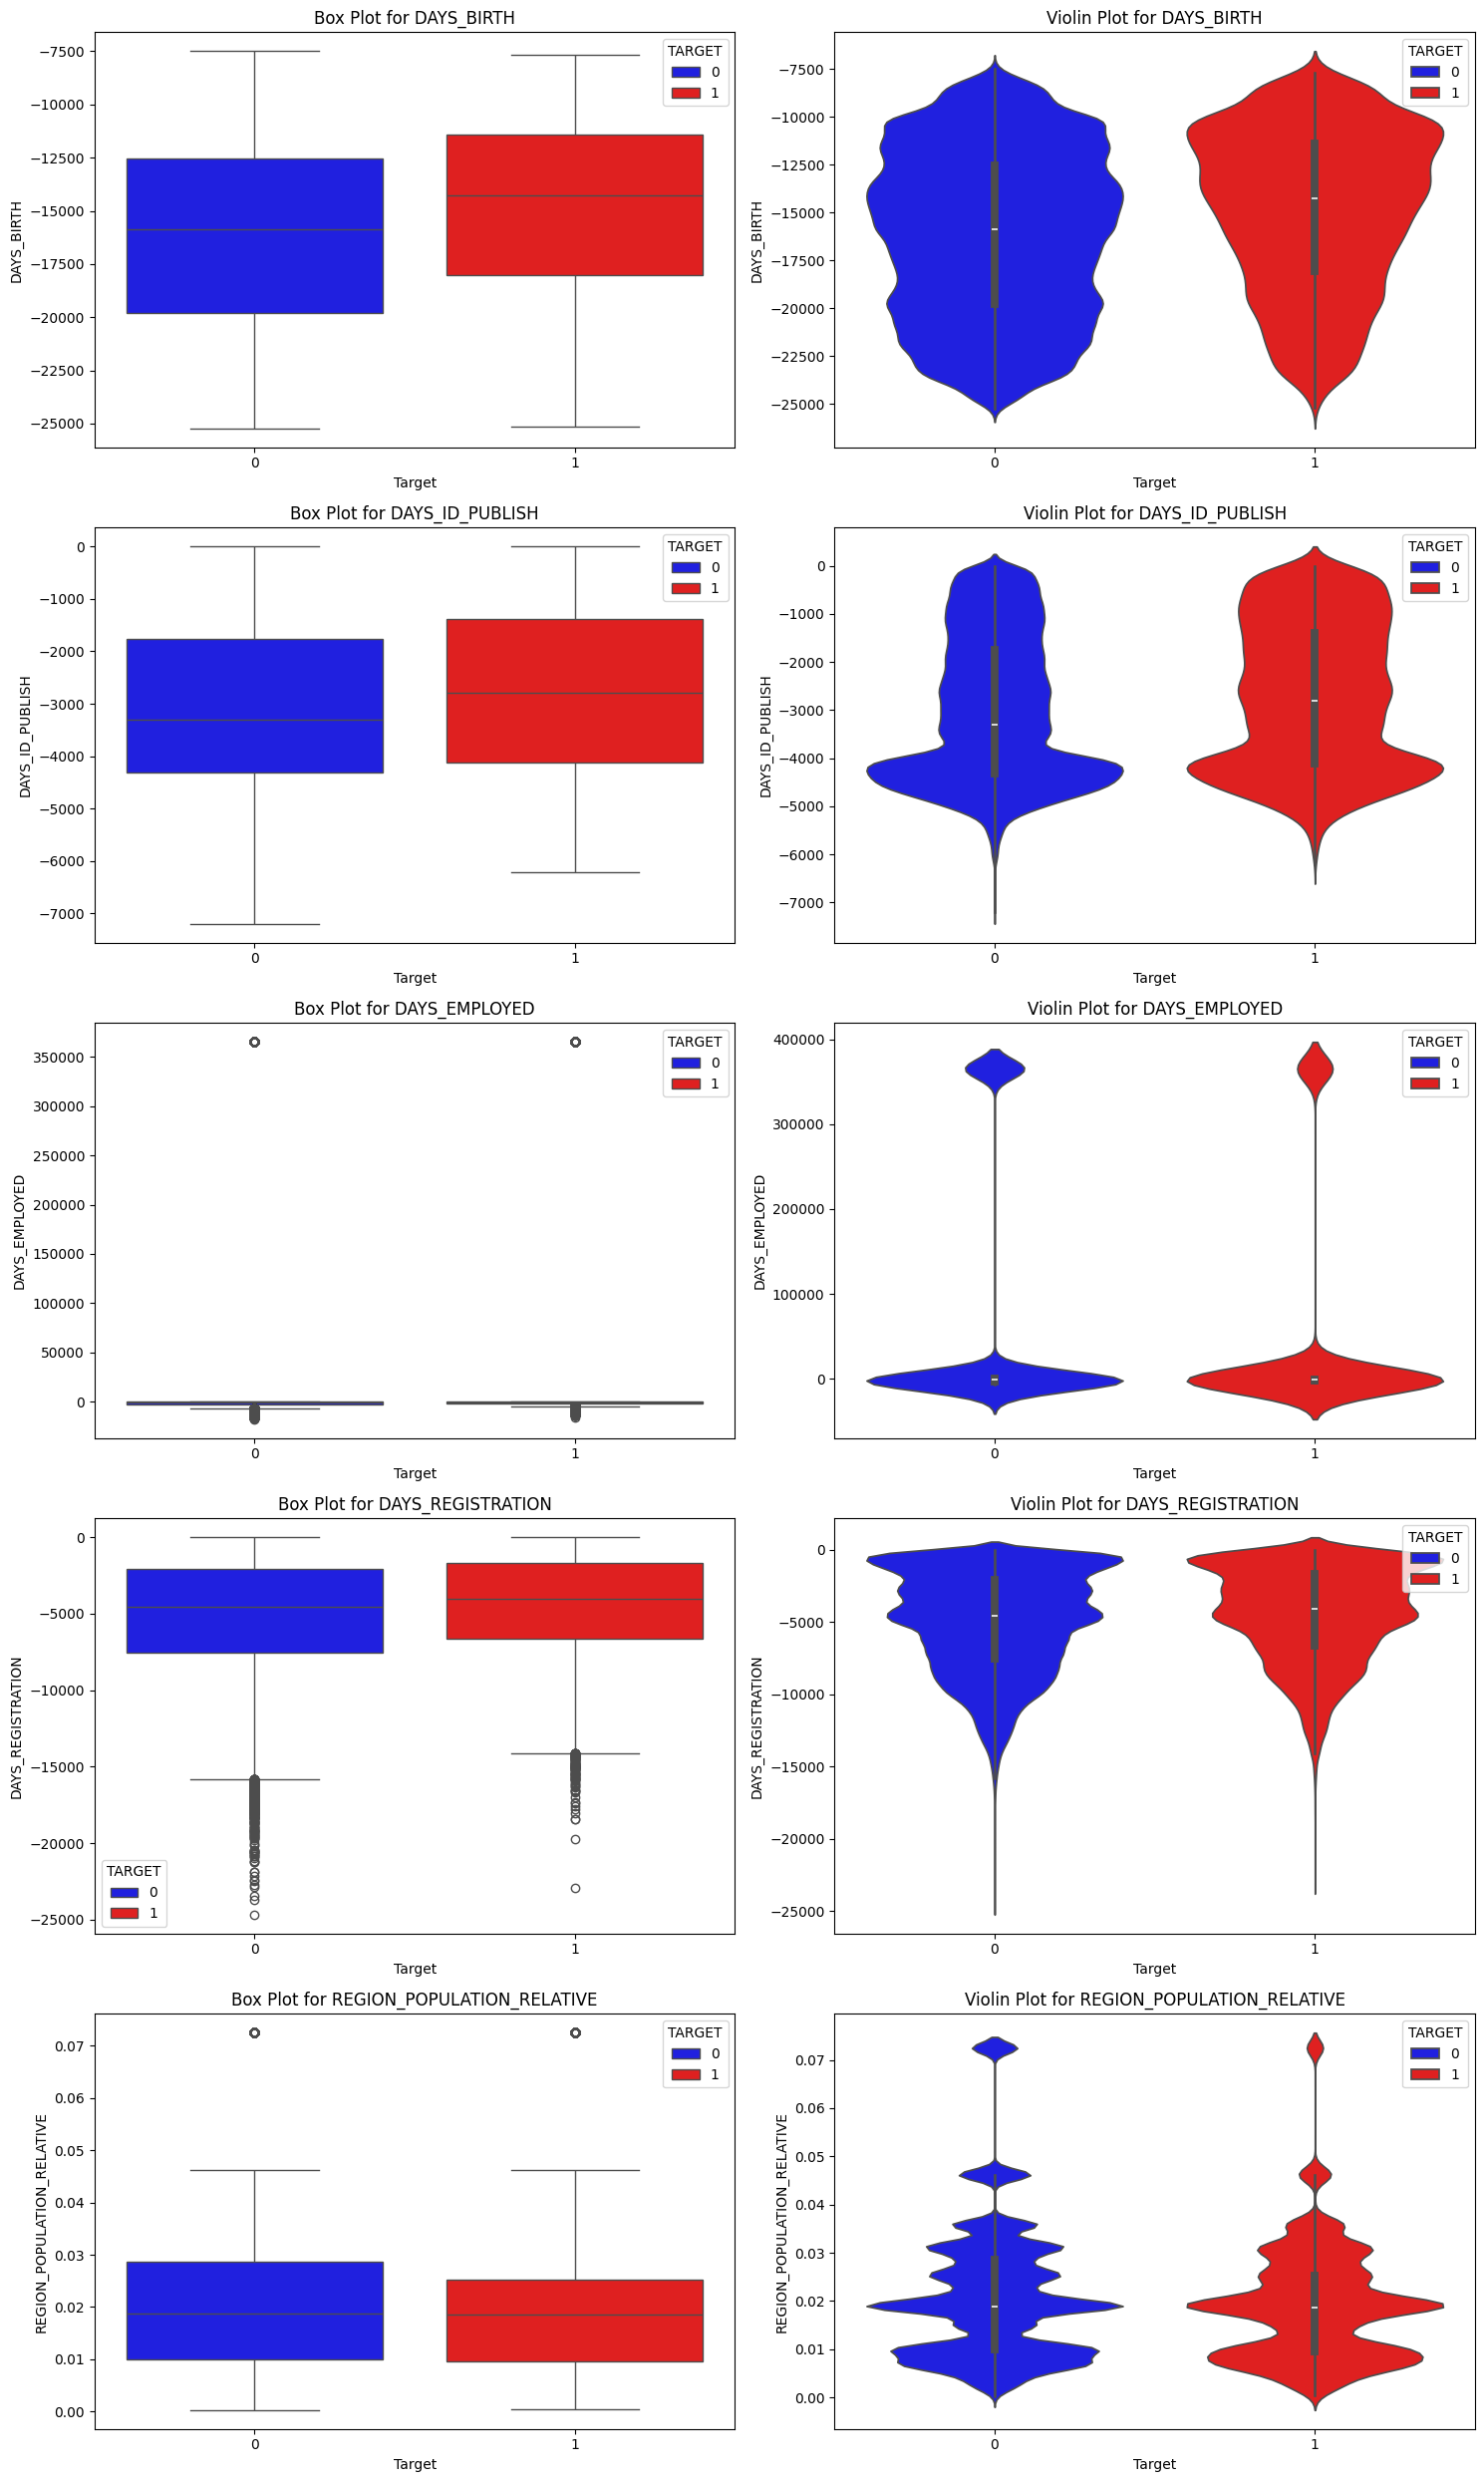

In [12]:
plt.figure(figsize=(15, 5 * len(top5_corr_vars)))

for i, var in enumerate(top5_corr_vars):
    # Box plot
    plt.subplot(len(top5_corr_vars), 2, 2 * i + 1)
    sns.boxplot(x=app_train[TGT], y=app_train[var], hue=app_train[TGT], palette={0: 'blue', 1: 'red'})
    plt.title(f'Box Plot for {var}')
    plt.xlabel('Target')
    plt.ylabel(var)

    # Violin plot
    plt.subplot(len(top5_corr_vars), 2, 2 * i + 2)
    sns.violinplot(x=app_train[TGT], y=app_train[var], hue=app_train[TGT], palette={0: 'blue', 1: 'red'})
    plt.title(f'Violin Plot for {var}')
    plt.xlabel('Target')
    plt.ylabel(var)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [13]:
for c in top5_corr_vars:
  _miss_count = len(app_train[app_train[c].isnull()])
  print(f"Null values in {c}: {_miss_count}, {round(_miss_count/len(app_train), 2) * 100} %")

Null values in DAYS_BIRTH: 0, 0.0 %
Null values in DAYS_ID_PUBLISH: 0, 0.0 %
Null values in DAYS_EMPLOYED: 0, 0.0 %
Null values in DAYS_REGISTRATION: 0, 0.0 %
Null values in REGION_POPULATION_RELATIVE: 0, 0.0 %


In [14]:
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

**Question 5:** Outlier Analysis: Perform outlier analysis on the chosen variables.

In [15]:
# Record count of rows where Z score of target column in higher than 2 and 3 separately
suff = "z_score"
z_score_cols = list()
outlier_df = list()

for c in top5_corr_vars:
  app_train[f"{c}_{suff}"] = zscore(app_train[c])
  over_2 = len(app_train[(app_train[f"{c}_{suff}"].abs() > 2)])
  over_3 = len(app_train[(app_train[f"{c}_{suff}"].abs() > 3)])
  outlier_df.append({"col": c, "over_2": over_2, "over_3": over_3})

outlier_df = pd.DataFrame(outlier_df)
outlier_df

,col,over_2,over_3
0,DAYS_BIRTH,1210,0
1,DAYS_ID_PUBLISH,390,0
2,DAYS_EMPLOYED,55374,0
3,DAYS_REGISTRATION,11330,749
4,REGION_POPULATION_RELATIVE,8412,8412


 **Question 6:** Transformation of Nuemric Variables: If skewed, perform suitable transformations on these five numerical variables. Check the relationship of each of these numeric variables with the target variable using bar charts.  Visualize the relationship between each of these numeric variables and the target variable. Perform outlier analysis on the transformed variables and report any differences before and after transformation.

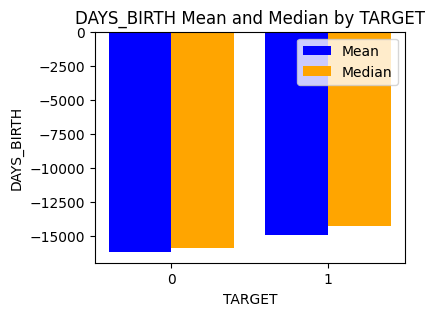

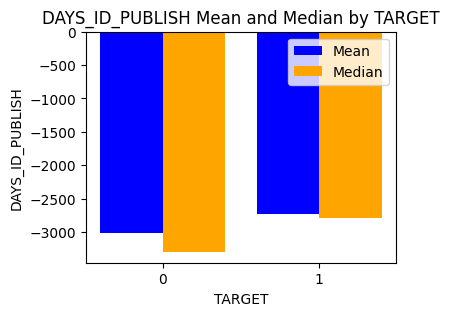

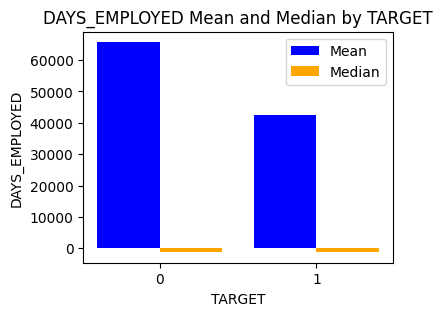

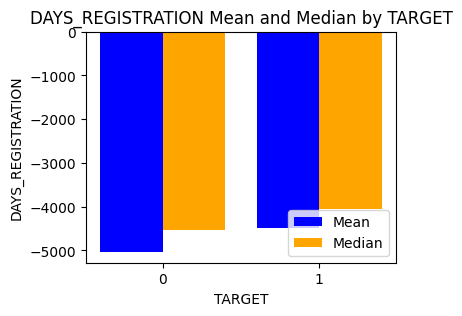

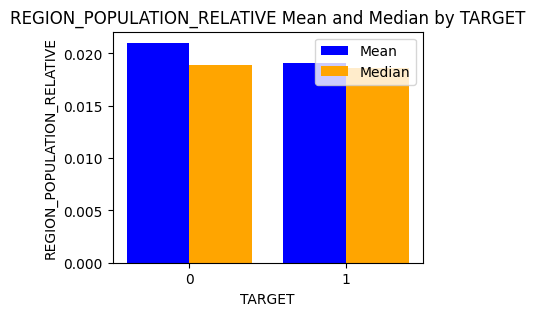

In [16]:
# Calculate the selected metrics for each numeric variable grouped by the target variable
metrics = ['mean', 'median']
central_tend = {}
for metric in metrics:
    if metric == 'mean':
        t = app_train.groupby(TGT)[top5_corr_vars].mean()
    elif metric == 'median':
        t = app_train.groupby(TGT)[top5_corr_vars].median()
    elif metric == 'std':
        t = app_train.groupby(TGT)[top5_corr_vars].std()
    elif metric == 'count':
        t = app_train.groupby(TGT)[top5_corr_vars].count()
    central_tend[metric] = t

# Merge the DataFrames on 'TARGET' column
merged_df = pd.merge(central_tend["mean"],
                     central_tend["median"],\
                     left_index=True, right_index=True,
                     suffixes=('_mean', '_median'))

merged_df = merged_df.reset_index()

# Columns to plot
columns_to_plot = list(merged_df.columns)[1:]

# Plot bar graphs
for column in top5_corr_vars:
    plt.figure(figsize=(4, 3))
    plt.bar(merged_df['TARGET'], merged_df[column + '_mean'], label='Mean', width=0.4, color='blue')
    plt.bar(merged_df['TARGET'] + 0.4, merged_df[column + '_median'], label='Median', width=0.4, color='orange')
    plt.xlabel('TARGET')
    plt.ylabel(column)
    plt.title(f'{column} Mean and Median by TARGET')
    plt.xticks(merged_df['TARGET'] + 0.2, merged_df['TARGET'])
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

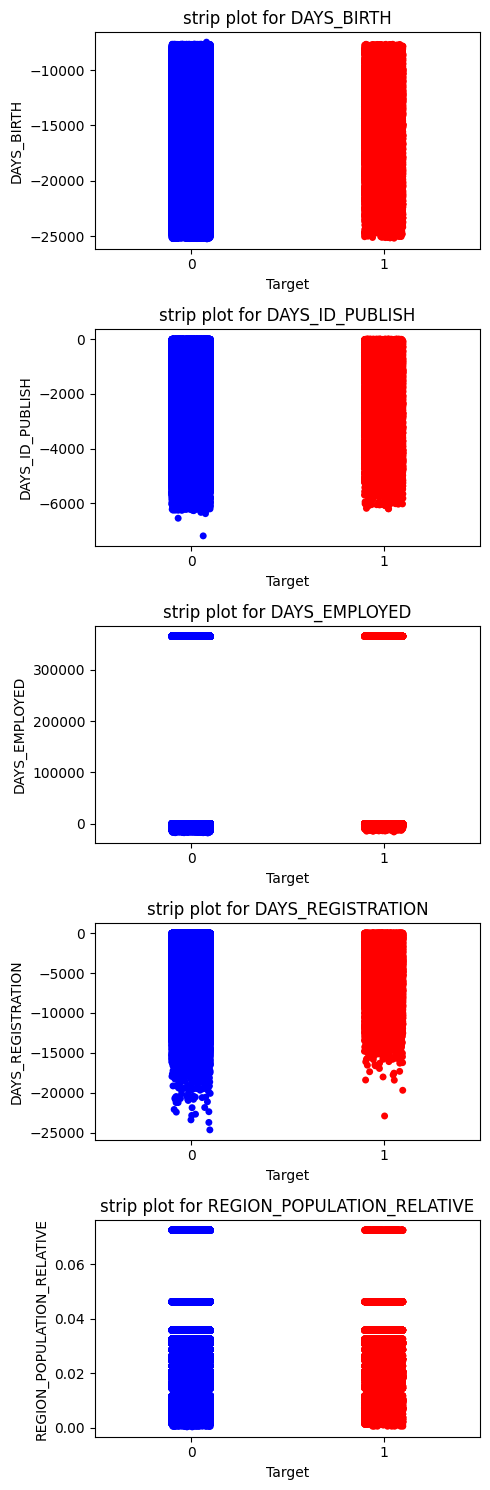

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
unique_tgt_values = app_train[TGT].unique()
palette = {value: 'blue' if value == 0 else 'red' for value in unique_tgt_values}
plt.figure(figsize=(5, 15))

for i, var in enumerate(top5_corr_vars):
    plt.subplot(len(top5_corr_vars), 1, i + 1)
    sns.stripplot(x=app_train[TGT], y=app_train[var], palette = {0:'blue', 1:'red'}, jitter = True, hue=app_train[TGT], legend=False)
    plt.title(f'strip plot for {var}')
    plt.xlabel('Target')
    plt.ylabel(var)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

Plotting: DAYS_BIRTH


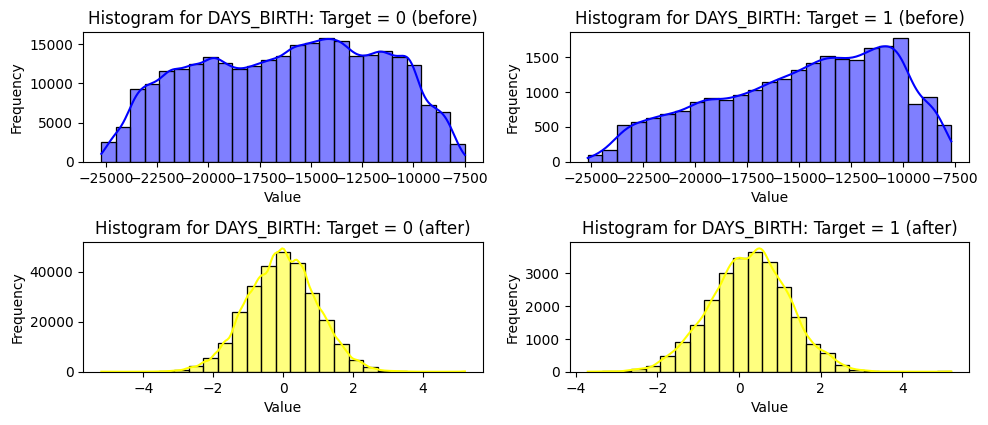

Plotting: DAYS_ID_PUBLISH


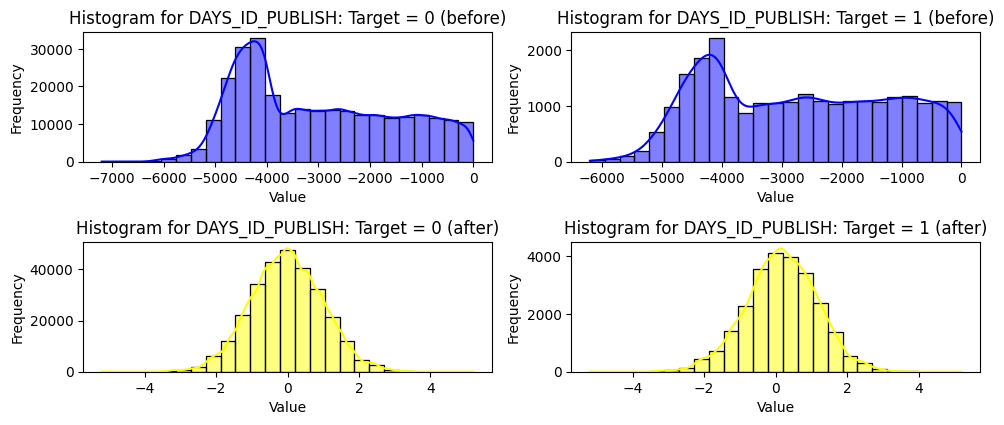

Plotting: DAYS_EMPLOYED


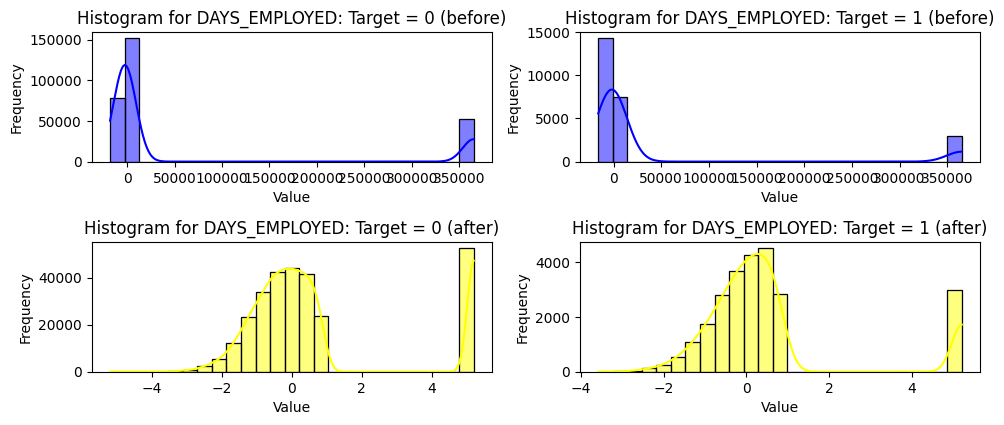

Plotting: DAYS_REGISTRATION


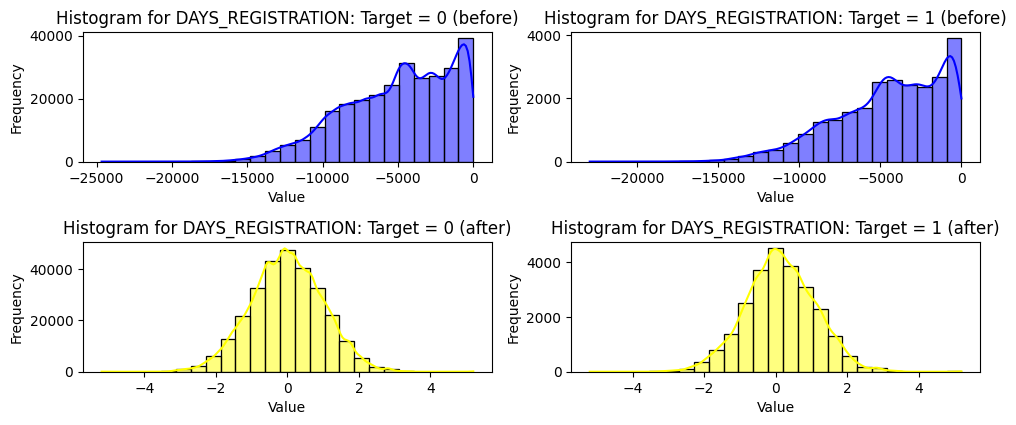

Plotting: REGION_POPULATION_RELATIVE


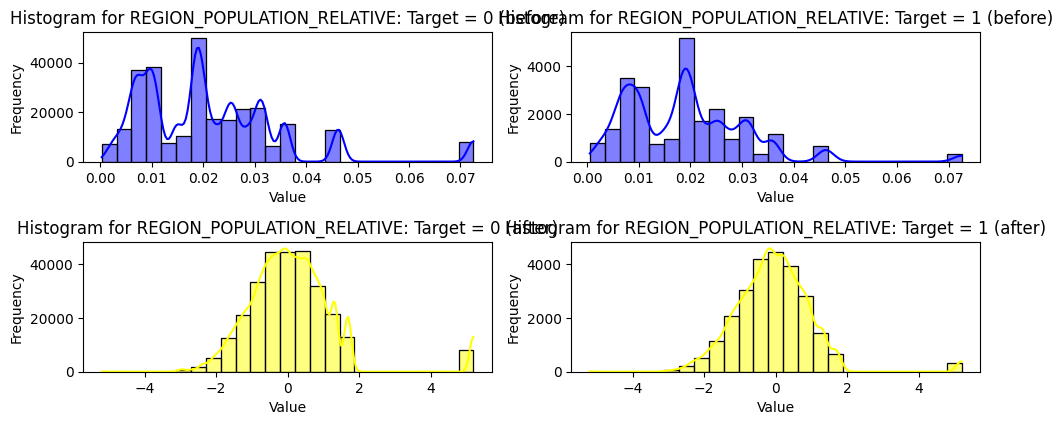

In [18]:
from sklearn.preprocessing import QuantileTransformer

# Transformation for DAYS_REGISTRATION
# Increasing - Positively skewed
t_map = dict()
t_map["DAYS_ID_PUBLISH"] = "quantile"
t_map["DAYS_REGISTRATION"] = "quantile"
t_map["DAYS_BIRTH"] = "quantile"
t_map["DAYS_EMPLOYED"] = "quantile"
t_map["REGION_POPULATION_RELATIVE"] = "quantile"

offset_map = dict()
offset_map["DAYS_REGISTRATION"] = 50000
offset_map["DAYS_ID_PUBLISH"] = "min"
offset_map["DAYS_BIRTH"] = "min"
offset_map["DAYS_EMPLOYED"] = "min"

def transform_var(df, var, t_type):
  if t_type == "log":
    df[var] = df[var].apply(lambda x: np.log(x + 1))
  elif t_type == "sqrt":
    df[var] = df[var].apply(lambda x: np.sqrt(x + 1))
  elif t_type == "cube_root":
    df[var] = df[var].apply(lambda x: x**(1/3))
  elif t_type == "exp":
    df[var] = df[var].apply(lambda x: np.exp(x))
  elif t_type == "inv":
    df[var] = df[var].apply(lambda x: 1/x)
  elif t_type == "logit":
    df[var] = df[var].apply(lambda x: np.log(x/(1+x)))
  elif t_type == "boxcox":
    df[var], _ = boxcox(df[var])
  elif t_type == "quantile":
    df[var] = QuantileTransformer(output_distribution='normal').fit_transform(np.array(df[var]).reshape(-1, 1))
  return df

def plot_histogram(df, col, col_i, all_cols, sp_i, sp_j, tgt_val, suffix, color="blue"):
  plt.subplot(len(all_cols), sp_i, sp_j)
  sns.histplot(x=df[col], bins=25, kde=True, color=color)
  plt.title(f'Histogram for {col}: Target = {tgt_val} ({suffix})')
  plt.xlabel('Value')
  plt.ylabel('Frequency')


def transform_var_and_plot(var, df, all_vars):

    i = 1
    plt.figure(figsize = (10,10))

    print(f"Plotting: {var}")

    if var in t_map:

      t_type = t_map[var]

      # ===============================
      # Plot before transformation
      # ===============================
      plot_histogram(df=df[(df[TGT] == 0)], col_i=i, col=var, suffix="before",
                    sp_i=2, sp_j=2*i+1, all_cols=all_vars, tgt_val="0")
      plot_histogram(df=app_train[(app_train[TGT] == 1)], col_i=i, col=var,
                    sp_i=2, sp_j=2*i+2, all_cols=all_vars, tgt_val="1", suffix="before")

      # ===============================
      # Transform data
      # ===============================
      if var in offset_map:
        if str(offset_map[var]) == "min":
          df[var] = df[var] + abs(df[var].min())
        else:
          df[var] = df[var] + offset_map[var]

      df = transform_var(df=df, var=var, t_type=t_type)

      # Increment the value of i
      i += 1

    else:
      print(f"No Transformation required")

    # ===============================
    # Plot after transformation
    # ===============================
    plot_histogram(df=df[(df[TGT] == 0)], col_i=i, col=var,
                  sp_i=2, sp_j=2*i+1, all_cols=all_vars, tgt_val="0",
                  color="yellow", suffix="after")
    plot_histogram(df=df[(df[TGT] == 1)], col_i=i, col=var,
                  sp_i=2, sp_j=2*i+2, all_cols=all_vars, tgt_val="1",
                  color="yellow", suffix="after")

    # Increment the value of i
    i += 1

    # Adjust layout to prevent overlapping titles
    plt.tight_layout()

    # Show the plots
    plt.show()

for var in top5_corr_vars:
  transform_var_and_plot(var=var, all_vars=top5_corr_vars, df=app_train)

In [19]:
# Running outlier analysis post transformation again
suff = "z_score"
z_score_cols = list()
outlier_df = list()

for c in top5_corr_vars:
  app_train[f"{c}_{suff}"] = zscore(app_train[c])
  over_2 = len(app_train[(app_train[f"{c}_{suff}"].abs() > 2)])
  over_3 = len(app_train[(app_train[f"{c}_{suff}"].abs() > 3)])
  outlier_df.append({"col": c, "over_2": over_2, "over_3": over_3})

outlier_df = pd.DataFrame(outlier_df)
outlier_df

,col,over_2,over_3
0,DAYS_BIRTH,13791,903
1,DAYS_ID_PUBLISH,14070,1062
2,DAYS_EMPLOYED,55411,0
3,DAYS_REGISTRATION,13512,741
4,REGION_POPULATION_RELATIVE,9741,8453


In [20]:
app_train.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

**Question 7:** Categorical Features: Check cardinality and rare values of at least five categorical features. Discuss whether each of them is ordinal or nominal. Discuss the suitable methods for encoding each of them.

In [21]:
cat_var = list()
cat_var.append("NAME_CONTRACT_TYPE")
cat_var.append("CODE_GENDER")
cat_var.append("ORGANIZATION_TYPE")
cat_var.append("WEEKDAY_APPR_PROCESS_START")
cat_var.append("EMERGENCYSTATE_MODE")

card = list()
card_pct = list()

for v in cat_var:
    u_count = len(app_train[v].unique())
    cat_pct = app_train[column].value_counts(normalize=True) * 100

    cat_pct = pd.DataFrame(app_train[v].value_counts(normalize=True) * 100)
    cat_pct = cat_pct.reset_index().rename(columns={"index": "val", v: "pct"})
    cat_pct["var"] = v

    card_pct.append(cat_pct)
    card.append({"var": v, "cardinality": u_count})

card = pd.DataFrame(card)
card_pct = pd.concat(card_pct, ignore_index=True).reset_index(drop=True)
card_pct.head()

,pct,proportion,var
0,Cash loans,90.478715,NAME_CONTRACT_TYPE
1,Revolving loans,9.521285,NAME_CONTRACT_TYPE
2,F,65.834393,CODE_GENDER
3,M,34.164306,CODE_GENDER
4,XNA,0.001301,CODE_GENDER


In [22]:
print(f"card.shape: {card.shape}")
card

card.shape: (5, 2)


,var,cardinality
0,NAME_CONTRACT_TYPE,2
1,CODE_GENDER,3
2,ORGANIZATION_TYPE,58
3,WEEKDAY_APPR_PROCESS_START,7
4,EMERGENCYSTATE_MODE,3


In [23]:
# All values which have percentages less than 5
# Our threshold for categorization intorarity is 5 percent
rare_df = card[card["cardinality"] < 5]
rare_df.head()

,var,cardinality
0,NAME_CONTRACT_TYPE,2
1,CODE_GENDER,3
4,EMERGENCYSTATE_MODE,3


**Categorical Variables:**
1. NAME_CONTRACT_TYPE: Nominal, One-Hot Encoding
2. CODE_GENDER: Nominal, One-Hot Encoding
3. ORGANIZATION_TYPE: Nominal, Target Encoding
4. WEEKDAY_APPR_PROCESS_START: Nominal, One-Hot Encoding
5. EMERGENCYSTATE_MODE: Nominal, Binary Encoding


**Question 8:** Feature Engineering: Utilize previous_application.csv to compute and integrate the count of previous applications per SK_ID_CURR into application_train.csv. Further, create at least five new features from additional files, justifying their selection and aggregation method.

In [28]:
prev_app = pd.read_csv(os.path.join(data_path, "previous_application.csv"))
bureau = pd.read_csv(os.path.join(data_path, "bureau.csv"))
bureau_bal = pd.read_csv(os.path.join(data_path, "bureau_balance.csv"))
cc_bal = pd.read_csv(os.path.join(data_path, "credit_card_balance.csv"))

# prev_app = pd.read_csv("previous_application.csv")
# bureau = pd.read_csv("bureau.csv")
# bureau_bal = pd.read_csv("bureau_balance.csv")
# cc_bal = pd.read_csv("credit_card_balance.csv")

In [29]:
# Integrate count of previous applications
app_train = app_train.merge(prev_app.groupby('SK_ID_CURR').size().reset_index(name='PREV_APP_COUNT'), on='SK_ID_CURR', how='left')

In [30]:
# Feature 1: AVG_AMT_BALANCE
# Represents the average balance maintained by the client across all credit cards. It's a direct indicator of the client's financial health and their ability to maintain a balance.
# Aggregation Method: Calculate the mean of AMT_BALANCE for each SK_ID_CURR across all records.
f1 = cc_bal.groupby('SK_ID_CURR')['AMT_BALANCE'].mean().reset_index(name='AVG_AMT_BALANCE')

# Feature 2: MAX_AMT_CREDIT_LIMIT_ACTUAL
# Shows the maximum credit limit that has been granted to the client on any of their credit cards, indicating the maximum level of trust a credit institution has in them.
# Aggregation Method: Find the maximum of AMT_CREDIT_LIMIT_ACTUAL for each SK_ID_CURR.
f2 = cc_bal.groupby('SK_ID_CURR')['AMT_CREDIT_LIMIT_ACTUAL'].max().reset_index(name='MAX_AMT_CREDIT_LIMIT_ACTUAL')

# Feature 3: TOTAL_ACTIVE_CREDITS
# The total number of active credits as reported by the bureau can indicate the current credit commitments of the client, providing insights into their debt levels.
# Aggregation Method: Count the number of rows where CREDIT_ACTIVE equals "Active" for each SK_ID_CURR.
f3 = bureau[bureau['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR').size().reset_index(name='TOTAL_ACTIVE_CREDITS')

# Feature 4: AVG_DAYS_CREDIT
# Reflects the average number of days since each credit was reported to the bureau, indicating the age of the client's credit history.
# Aggregation Method: Calculate the mean of DAYS_CREDIT (considering the absolute value to reflect the age) for each SK_ID_CURR.
f4 = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].mean().reset_index(name='AVG_DAYS_CREDIT').abs()

# Feature 5: AVG_CREDIT_UTILIZATION
# Credit utilization ratio is a crucial factor in credit scoring models, reflecting the amount of credit the client uses relative to their credit limit. Lower utilization rates are generally seen as indicators of good credit management and financial health, as they suggest the client is not overly reliant on credit. This feature calculates the average credit utilization ratio across all the client's credit card records.
# Calculate the credit utilization ratio for each record in cc_bal by dividing AMT_BALANCE by AMT_CREDIT_LIMIT_ACTUAL (taking care to handle division by zero).
# Compute the average of these ratios for each SK_ID_CURR to get their average credit utilization.
cc_bal['CREDIT_UTILIZATION'] = cc_bal.apply(lambda x: x['AMT_BALANCE'] / x['AMT_CREDIT_LIMIT_ACTUAL'] if x['AMT_CREDIT_LIMIT_ACTUAL'] > 0 else 0, axis=1)
f5 = cc_bal.groupby('SK_ID_CURR')['CREDIT_UTILIZATION'].mean().reset_index(name='AVG_CREDIT_UTILIZATION')

In [31]:
# Merge all features
for f in [f1, f2, f3, f4, f5]:
  app_train = app_train.merge(f, on='SK_ID_CURR', how='left')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH_z_score,DAYS_EMPLOYED_z_score,DAYS_REGISTRATION_z_score,REGION_POPULATION_RELATIVE_z_score,PREV_APP_COUNT,AVG_AMT_BALANCE,MAX_AMT_CREDIT_LIMIT_ACTUAL,TOTAL_ACTIVE_CREDITS,AVG_DAYS_CREDIT,AVG_CREDIT_UTILIZATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.492319,-0.124706,0.217239,-0.118721,1.0,NaN,NaN,2.0,874.00,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.760650,-0.295551,0.978618,-1.582793,3.0,NaN,NaN,1.0,1400.75,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.298792,0.033109,0.065656,-0.577713,1.0,NaN,NaN,NaN,867.00,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.342485,-0.649687,-1.260649,-0.831600,9.0,0.0,270000.0,NaN,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-0.087390,-0.649470,0.046744,0.502601,6.0,NaN,NaN,NaN,1149.00,NaN


**Question 9:** NaN Handling. Document your strategy for managing NaN values, providing rationale for your chosen approach.

In [32]:
# We will only consider numerical, categorical and new features for checking null values and deciding the strategy
# to handle null appropriately. Same strategies can be extended to handle similar columns.

num_vars = list()
num_vars.append("DAYS_ID_PUBLISH")
num_vars.append("DAYS_REGISTRATION")
num_vars.append("DAYS_BIRTH")
num_vars.append("DAYS_EMPLOYED")
num_vars.append("REGION_POPULATION_RELATIVE")

extra_features = list()
extra_features.append("AVG_AMT_BALANCE")
extra_features.append("MAX_AMT_CREDIT_LIMIT_ACTUAL")
extra_features.append("TOTAL_ACTIVE_CREDITS")
extra_features.append("AVG_DAYS_CREDIT")
extra_features.append("AVG_CREDIT_UTILIZATION")

all_req_cols = cat_var + num_vars + extra_features
all_req_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'EMERGENCYSTATE_MODE',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'REGION_POPULATION_RELATIVE',
 'AVG_AMT_BALANCE',
 'MAX_AMT_CREDIT_LIMIT_ACTUAL',
 'TOTAL_ACTIVE_CREDITS',
 'AVG_DAYS_CREDIT',
 'AVG_CREDIT_UTILIZATION']

In [33]:
# Percentage of Missing Values
miss_df = app_train[all_req_cols].isnull().sum().sort_values(ascending=False)/len(app_train)
miss_df = miss_df[miss_df > 0]
miss_df

AVG_AMT_BALANCE                0.717392
MAX_AMT_CREDIT_LIMIT_ACTUAL    0.717392
AVG_CREDIT_UTILIZATION         0.717392
EMERGENCYSTATE_MODE            0.473983
TOTAL_ACTIVE_CREDITS           0.293846
AVG_DAYS_CREDIT                0.143149
dtype: float64

In [34]:
# Checking unique values in columns to decide how to handle NULLS
# This is the only categorical column to be considered
app_train["EMERGENCYSTATE_MODE"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [35]:
# AVG_AMT_BALANCE
# MAX_AMT_CREDIT_LIMIT_ACTUAL
# AVG_DAYS_CREDIT
for c in ["AVG_AMT_BALANCE", "MAX_AMT_CREDIT_LIMIT_ACTUAL", "AVG_DAYS_CREDIT"]:
  num_rows = len(cc_bal[cc_bal["SK_ID_CURR"].isin(list(app_train[app_train[c].isnull()]["SK_ID_CURR"]))])
  print(f"Number of rows {c}: {str(num_rows)}")

Number of rows AVG_AMT_BALANCE: 0
Number of rows MAX_AMT_CREDIT_LIMIT_ACTUAL: 0
Number of rows AVG_DAYS_CREDIT: 375463


In [36]:
# AVG_CREDIT_UTILIZATION
# TOTAL_ACTIVE_CREDITS
for c in ["AVG_CREDIT_UTILIZATION", "TOTAL_ACTIVE_CREDITS"]:
  num_rows = len(bureau[bureau["SK_ID_CURR"].isin(list(app_train[app_train[c].isnull()]["SK_ID_CURR"]))])
  print(f"Number of rows {c}: {str(num_rows)}")

Number of rows AVG_CREDIT_UTILIZATION: 1014675
Number of rows TOTAL_ACTIVE_CREDITS: 119568


**Handling Null Values**

***Categorical variables***

*  EMERGENCYSTATE_MODE: This is a categorical variable with only 2 unique values "Yes" and "No". For the rows with missing values, we can fill the column with an "Unknown" string.

***Numerical variables***

All the numerical fields are derived fields (type numerical) and the missing values are indicative of this data not being available (i.e. no history available for those customers). We can fill it with zeroes since it would indicate zero values for maintained by the client:

*   AVG_CREDIT_UTILIZATION - Indicate 0 credit utilization.
*   TOTAL_ACTIVE_CREDITS - Total active credits 0.
*   AVG_AMT_BALANCE - 0 average amount balance.
*   MAX_AMT_CREDIT_LIMIT_ACTUAL - 0 credit limit.
*   AVG_DAYS_CREDIT - 0 days of credit.

**NOTE: ** For all the numerical variables, we will also add a flag which will be indicative of whether the value is missing or not. In total we will need 5 flag columns, one for each of the above columns.


In [ ]:
app_train.to_csv("app_train_modified.csv")

# **Post Mid-Term Modelling**

## Data Preparation and Pipeline setup

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import zscore
from feature_engine.encoding import RareLabelEncoder # For encoding rare labels; we could have also used sklearn encoder with infrequent categories
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import OutlierTrimmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [39]:
import pandas as pd

Dropping Columns with less than 50% Missing Values

In [40]:
app_train_mod = app_train.copy()

In [41]:
_null_count = app_train_mod.isnull().sum().sort_values(ascending = False)
_null_count = _null_count[_null_count <= (len(app_train_mod) * 0.20)]
print(f"len(_null_count): {len(_null_count)}")

app_train_mod = app_train_mod.reindex(columns = _null_count.index.tolist())
print(f"app_train_mod.shape (dropped columns with lots of nulls): {app_train_mod.shape}")
print(f"app_train_mod.duplicated().sum(): {app_train_mod.duplicated().sum()}")

len(_null_count): 79
app_train_mod.shape (dropped columns with lots of nulls): (307511, 79)
app_train_mod.duplicated().sum(): 0


In [42]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
AV.AutoViz("", depVar= TGT,dfte = app_train_mod)

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 79)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  29
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  4
    Number of Numeric-Boolean Columns =  

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
EXT_SOURCE_3,float64,19.956667,NA,0.000527,0.896010,"29935 missing values. Impute them with mean, median, mode, or a constant value such as 123."
AVG_DAYS_CREDIT,float64,14.347333,NA,0.000000,2922.000000,"21521 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1691 outliers greater than upper bound (2588.75) or lower than lower bound(-493.25). Cap them or remove them."
AMT_REQ_CREDIT_BUREAU_MON,float64,13.501333,NA,0.000000,23.000000,"20252 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 21342 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."
PREV_APP_COUNT,float64,5.328000,NA,1.000000,73.000000,"7992 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 7459 outliers greater than upper bound (12.00) or lower than lower bound(-4.00). Cap them or remove them."
EXT_SOURCE_2,float64,0.214000,NA,0.000005,0.855000,"321 missing values. Impute them with mean, median, mode, or a constant value such as 123."
DAYS_LAST_PHONE_CHANGE,float64,0.000667,NA,-4292.000000,0.000000,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 218 outliers greater than upper bound (1663.50) or lower than lower bound(-3508.50). Cap them or remove them."
AMT_INCOME_TOTAL,float64,0.000000,NA,25650.000000,18000090.000000,Column has 6899 outliers greater than upper bound (337500.00) or lower than lower bound(-22500.00). Cap them or remove them.
AMT_REQ_CREDIT_BUREAU_YEAR,float64,13.501333,NA,0.000000,22.000000,"20252 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1667 outliers greater than upper bound (7.50) or lower than lower bound(-4.50). Cap them or remove them."
AMT_REQ_CREDIT_BUREAU_QRT,float64,13.501333,NA,0.000000,19.000000,"20252 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 24560 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."
AMT_REQ_CREDIT_BUREAU_DAY,float64,13.501333,NA,0.000000,8.000000,"20252 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 713 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them."


Total Number of Scatter Plots = 231
All Plots done
Time to run AutoViz = 124 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,EXT_SOURCE_3,AVG_DAYS_CREDIT,AMT_REQ_CREDIT_BUREAU_MON,PREV_APP_COUNT,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,CNT_FAM_MEMBERS,AMT_ANNUITY,DAYS_EMPLOYED_z_score,DAYS_BIRTH,REGION_POPULATION_RELATIVE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,OBS_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,NAME_TYPE_SUITE,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,NAME_CONTRACT_TYPE,FLAG_DOCUMENT_8,CODE_GENDER,FLAG_DOCUMENT_9,FLAG_DOCUMENT_17,FLAG_DOCUMENT_20,TARGET
253947,NaN,180.000000,0.0,1.0,0.159322,-8.0,112500.0,0.0,0.0,0.0,1.0,2.0,21816.0,-0.088011,1.226386,-0.163824,0.0,1.373746,-0.089924,1.0,0.0,Unaccompanied,0,0,Cash loans,0,F,0,0,0,0
302190,0.715103,1269.000000,0.0,NaN,0.785922,-643.0,405000.0,0.0,0.0,0.0,0.0,2.0,11250.0,-1.038353,-0.389249,1.684464,0.0,0.751890,1.088943,1.0,0.0,Unaccompanied,0,0,Revolving loans,0,M,0,0,0,1
270220,0.472253,1413.681818,0.0,7.0,0.169953,-1118.0,202500.0,3.0,0.0,0.0,0.0,2.0,18040.5,-0.689922,-1.701739,0.134645,0.0,-1.618226,-0.357069,0.0,0.0,Unaccompanied,0,0,Cash loans,0,F,0,0,0,0
156194,0.780144,1253.333333,0.0,5.0,0.646524,-846.0,135000.0,2.0,0.0,0.0,0.0,2.0,42385.5,-0.837413,-0.451297,1.318946,0.0,0.900435,1.682452,2.0,0.0,Unaccompanied,0,0,Cash loans,1,M,0,0,0,1
189667,NaN,NaN,NaN,NaN,0.784102,-226.0,315000.0,NaN,NaN,NaN,NaN,2.0,24750.0,-0.901045,-1.428183,-0.798769,0.0,-5.199338,0.012071,0.0,NaN,Unaccompanied,0,0,Revolving loans,0,M,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138860,0.497469,1209.000000,0.0,2.0,0.784665,-2535.0,135000.0,1.0,0.0,0.0,0.0,2.0,21609.0,-0.377453,-0.045514,0.324254,0.0,-0.947580,1.093425,0.0,0.0,Unaccompanied,0,0,Cash loans,0,M,0,0,0,1
64389,0.810618,1823.285714,2.0,1.0,0.655614,-507.0,135000.0,1.0,0.0,0.0,0.0,2.0,31653.0,2.024377,-1.435355,5.199338,0.0,-0.344749,0.408149,0.0,0.0,Unaccompanied,1,0,Cash loans,0,M,0,0,0,1
6086,0.484851,347.666667,0.0,6.0,0.616141,-826.0,90000.0,2.0,0.0,0.0,0.0,1.0,20772.0,-0.368728,0.703367,-1.674186,0.0,-0.810801,1.151862,6.0,0.0,Unaccompanied,0,0,Cash loans,0,F,0,0,0,1
217721,0.067794,608.666667,0.0,4.0,0.313795,-694.0,126000.0,1.0,0.0,0.0,0.0,1.0,15331.5,0.105609,1.128438,-0.060256,0.0,-0.026462,1.303989,0.0,0.0,Unaccompanied,0,0,Cash loans,0,F,0,0,0,1


In [43]:
new_col = ["EXT_SOURCE_3", "AVG_DAYS_CREDIT", "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "PREV_APP_COUNT", "EXT_SOURCE_2", "DAYS_LAST_PHONE_CHANGE",
"HOUR_APPR_PROCESS_START", "AMT_INCOME_TOTAL", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR",
"CNT_FAM_MEMBERS", "REGION_RATING_CLIENT_W_CITY", "AMT_ANNUITY", "DAYS_EMPLOYED_z_score", "DAYS_BIRTH_z_score", "REGION_POPULATION_RELATIVE", "OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE", "DAYS_ID_PUBLISH_z_score", "DAYS_REGISTRATION_z_score", "NAME_TYPE_SUITE", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_15",
"FLAG_DOCUMENT_3", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "TARGET"]

app_train_selected_col = app_train_mod[new_col]
app_train_selected_col.shape

(307511, 31)

In [44]:
# Pipeline for Skewed numeric variables
skewed_num_pipe  = Pipeline(steps = [("imp", SimpleImputer(strategy= "median")),
                                     ("out", Winsorizer(capping_method='quantiles', tail='both', fold=.01))]) # several capping methods: gaussian; iqr; quantile. Fold paramater indicates how far from the central position.

# Pipeline for normally distributed numeric variables
norm_num_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "mean", add_indicator= True))])


# Pipeline for variables that need discretization - We decide which ones to discretize based on logic
disc_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "median", add_indicator= True)),
                              ("disc", KBinsDiscretizer(strategy= "equal_width", encode = "ordinal"))])

In [45]:
# Nominal categorical variables
nom_cat_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "constant", fill_value = "missing")),
                                 ("ohe", OneHotEncoder(sparse_output=False))])

# Ordinal Catgeorical variables
ord_cat_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "most_frequent", add_indicator = True)),
                                 ("ord", OrdinalEncoder( ))])

# Pipeline for Categorical variables with rare categories
rare_cat_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "constant", fill_value = "rare")),
                                  ("rare", RareLabelEncoder(tol=0.05, n_categories=4)),
                                  ("ohe", OneHotEncoder(sparse_output=False))])

In [46]:
# Nominal categorical variables from the dataset
nom_cat_vars = ["NAME_TYPE_SUITE"]

# Ordinal categorical variables from the dataset
ord_cat_vars = [] # There is none thus kept blank. If for a new dataset, you find some relevant variables pass them here

# Categorical variables with rare categories
rare_cat_vars = []

# Numeric variables that require discretization
disc_num_vars = [] # None here

# Numeric variables that are normally distributed
norm_num_vars = ["EXT_SOURCE_3", "EXT_SOURCE_2", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_3",
                 "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]

# Numeric variables that ahave skew in them
skewed_num_vars = ["AVG_DAYS_CREDIT", "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "PREV_APP_COUNT", "DAYS_LAST_PHONE_CHANGE",
"HOUR_APPR_PROCESS_START", "AMT_INCOME_TOTAL", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT",
"CNT_FAM_MEMBERS", "REGION_RATING_CLIENT_W_CITY", "AMT_ANNUITY", "DAYS_EMPLOYED_z_score", "DAYS_BIRTH_z_score", "REGION_POPULATION_RELATIVE", "OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE", "DAYS_ID_PUBLISH_z_score", "DAYS_REGISTRATION_z_score"]

In [ ]:
preprocessor = ColumnTransformer(transformers = [("nom", nom_cat_pipe, nom_cat_vars),
                                                 ("ord", ord_cat_pipe, ord_cat_vars),
                                                 ("rare", rare_cat_pipe, rare_cat_vars),
                                                 ("norm", norm_num_pipe, norm_num_vars),
                                                 ("skew", skewed_num_pipe, skewed_num_vars),
                                                 ("disc", disc_pipe, disc_num_vars),
                                                 ], remainder = "passthrough")


preprocessor.set_output(transform = "pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('nom',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['NAME_TYPE_SUITE']),
                                ('ord',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent')),
                                                 ('ord', OrdinalEncoder())]),
                                 []),
                                ('rare',
                                 Pipeline(ste...
                                  'REGION_RATING_CLIENT_W_CITY', 'AMT_ANNUITY',
                                  'DAYS_EMPLOYED_z_score', 'DAYS_BIRTH_z_score',
                                  'REGION_POPULATION_RELATIVE',
                                  'OBS_60_CNT_SOCIAL_CIRCLE',
                                  'DEF_30_CNT_SOCIAL_CIRCLE',
                                  'DAYS_ID_PUBLISH_z_score',
                                  'DAYS_REGISTRATION_z_score']),
                                ('disc',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('disc',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='equal_width'))]),
                                 [])])

In [ ]:
# Define target and features
target = 'TARGET'
features = app_train_selected_col.columns.drop(target)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(app_train_selected_col[features], app_train_selected_col[target], test_size=0.2, random_state=42)

## Random Forest

In [ ]:
import time
st = time.time()

modeling_pipeline_rf = Pipeline(steps = [("pre", preprocessor),  ("clf", RandomForestClassifier())])
modeling_pipeline_rf.fit(X_train,y_train)
test_pred_rf = modeling_pipeline_rf.predict(X_test)

precision = precision_score(y_test, test_pred_rf)
recall = recall_score(y_test, test_pred_rf)
f1 = f1_score(y_test, test_pred_rf)
accuracy = accuracy_score(y_test, test_pred_rf)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))

et = time.time()
print(f"Time taken: {et - st} seconds")

Precision: 59.52%
Recall: 0.51%
F1 Score: 1.00%
Accuracy: 91.97%
Time taken: 131.97388172149658 seconds


## Logistics Regression

In [ ]:
import time
st = time.time()

modeling_pipeline_lr = Pipeline(steps = [("pre", preprocessor),  ("clf", LogisticRegression(max_iter=15000, penalty='l2', solver='lbfgs', C=1.0, tol=0.01))])
modeling_pipeline_lr.fit(X_train,y_train)
test_pred_lr = modeling_pipeline_lr.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, test_pred_lr)
recall = recall_score(y_test, test_pred_lr)
f1 = f1_score(y_test, test_pred_lr)
accuracy = accuracy_score(y_test, test_pred_lr)

# Print metrics
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))

et = time.time()
print(f"Time taken: {et - st} seconds")

Precision: 62.50%
Recall: 0.20%
F1 Score: 0.40%
Accuracy: 91.96%
Time taken: 322.9417860507965 seconds


## Gradient Boosting

In [ ]:
import time
st = time.time()

modeling_pipeline_gb = Pipeline(steps = [("pre", preprocessor),  ("clf", GradientBoostingClassifier())])
modeling_pipeline_gb.fit(X_train,y_train)
test_pred_gb = modeling_pipeline_gb.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, test_pred_gb)
recall = recall_score(y_test, test_pred_gb)
f1 = f1_score(y_test, test_pred_gb)
accuracy = accuracy_score(y_test, test_pred_gb)

# Print metrics
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))

et = time.time()
print(f"Time taken: {et - st} seconds")

Precision: 52.00%
Recall: 0.79%
F1 Score: 1.55%
Accuracy: 91.96%
Time taken: 126.92177295684814 seconds


## Grid Search CV

### **Logistics Regression CV**

In [ ]:
param_grid_lr = {
    'clf__C': [0.1, 1, 10]  # Regularization strength for Logistic Regression
}

lr_grid_search = GridSearchCV(modeling_pipeline_lr, param_grid_lr, scoring='f1', cv=3, verbose=2)
lr_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .........................................clf__C=0.1; total time=  15.8s
[CV] END .........................................clf__C=0.1; total time= 3.2min
[CV] END .........................................clf__C=0.1; total time=   7.5s
[CV] END ...........................................clf__C=1; total time=   4.5s
[CV] END ...........................................clf__C=1; total time=   6.4s
[CV] END ...........................................clf__C=1; total time=   5.2s
[CV] END ..........................................clf__C=10; total time=   5.7s
[CV] END ..........................................clf__C=10; total time=   7.3s
[CV] END ..........................................clf__C=10; total time=   5.9s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('nom',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['NAME_TYPE_SUITE']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='most_frequent')),...
                                                                          'DEF_30_CNT_SOCIAL_CIRCLE',
                                                                          'DAYS_ID_PUBLISH_z_score',
                                                                          'DAYS_REGISTRATION_z_score']),
                                                                        ('disc',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('disc',
                                                                                          KBinsDiscretizer(encode='ordinal',
                                                                                                           strategy='equal_width'))]),
                                                                         [])])),
                                       ('clf',
                                        LogisticRegression(max_iter=15000,
                                                           tol=0.01))]),
             param_grid={'clf__C': [0.1, 1, 10]}, scoring='f1', verbose=2)

In [ ]:
best_params_lr = lr_grid_search.best_params_
best_score_lr = lr_grid_search.best_score_

print("Logistics Regression Model:")
print(f"Best parameters: {best_params_lr}")
print(f"Best cross-validation score: {round(best_score_lr, 2)}")

test_pred_lr = lr_grid_search.best_estimator_.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, test_pred_lr)
recall = recall_score(y_test, test_pred_lr)
f1 = f1_score(y_test, test_pred_lr)
accuracy = accuracy_score(y_test, test_pred_lr)

# Print metrics
print("\n")
print("Printing results on Test Data")
print(f"Confusion Matrix: {confusion_matrix(y_test, test_pred_lr)}")
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))

Logistics Regression Model:
Best parameters: {'clf__C': 0.1}
Best cross-validation score: 0.0


Printing results on Test Data
Confusion Matrix: [[56554     0]
 [ 4949     0]]
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%
Accuracy: 91.95%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Random Forest CV**

In [ ]:
param_grid_rf = {
    'clf__min_samples_split': [1, 5, 10], # Minimum number of samples required to split an internal node
    'clf__min_samples_leaf': [2, 4], # Minimum number of samples required to be at a leaf node
    'clf__criterion': ['gini']
    }

rf_grid_search = GridSearchCV(modeling_pipeline_rf, param_grid_rf, scoring='f1', cv=3, verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=1; total time=   0.9s
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=1; total time=   0.9s
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=1; total time=   1.1s
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=5; total time= 1.4min
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=5; total time= 1.2min
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=5; total time= 1.1min
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=10; total time= 1.1min
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=10; total time= 1.1min
[CV] END clf__criterion=gini, clf__min_samples_leaf=2, clf__min_samples_split=10; total time= 1.1min
[CV] END clf__criterion=gini, clf__mi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('nom',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['NAME_TYPE_SUITE']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='most_frequent')),...
                                                                          'DAYS_REGISTRATION_z_score']),
                                                                        ('disc',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('disc',
                                                                                          KBinsDiscretizer(encode='ordinal',
                                                                                                           strategy='equal_width'))]),
                                                                         [])])),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['gini'],
                         'clf__min_samples_leaf': [2, 4],
                         'clf__min_samples_split': [1, 5, 10]},
             scoring='f1', verbose=2)

In [ ]:
best_params_rf = rf_grid_search.best_params_
best_score_rf = rf_grid_search.best_score_

print("Random Forest Model:")
print(f"Best parameters: {best_params_rf}")
print(f"Best cross-validation score: {round(best_score_rf, 2)}")

test_pred_rf = rf_grid_search.best_estimator_.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, test_pred_rf)
recall = recall_score(y_test, test_pred_rf)
f1 = f1_score(y_test, test_pred_rf)
accuracy = accuracy_score(y_test, test_pred_rf)

# Print metrics
print("\n")
print("Printing results on Test Data")
print(f"Confusion Matrix: {confusion_matrix(y_test, test_pred_rf)}")
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest Model:
Best parameters: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5}
Best cross-validation score: 0.01


Printing results on Test Data
Confusion Matrix: [[56547     7]
 [ 4936    13]]
Precision: 65.00%
Recall: 0.26%
F1 Score: 0.52%
Accuracy: 91.96%


### **Gradient Boosting CV**

In [ ]:
param_grid_gb = {
    'clf__learning_rate': [0.05, 0.1, 0.2], # Learning rate parameter for GradientBoosting
    'clf__max_depth': [3, 5],  # Adjust depth for tree-based models, None for no maximum depth
}

gb_grid_search = GridSearchCV(modeling_pipeline_gb, param_grid_gb, scoring='f1', cv=3, verbose=2)
gb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ..........clf__learning_rate=0.05, clf__max_depth=3; total time= 1.9min
[CV] END ..........clf__learning_rate=0.05, clf__max_depth=3; total time= 1.6min
[CV] END ..........clf__learning_rate=0.05, clf__max_depth=3; total time= 1.4min
[CV] END ..........clf__learning_rate=0.05, clf__max_depth=5; total time= 2.4min
[CV] END ..........clf__learning_rate=0.05, clf__max_depth=5; total time= 2.4min
[CV] END ..........clf__learning_rate=0.05, clf__max_depth=5; total time= 2.3min
[CV] END ...........clf__learning_rate=0.1, clf__max_depth=3; total time= 1.3min
[CV] END ...........clf__learning_rate=0.1, clf__max_depth=3; total time= 1.4min
[CV] END ...........clf__learning_rate=0.1, clf__max_depth=3; total time= 1.4min
[CV] END ...........clf__learning_rate=0.1, clf__max_depth=5; total time= 2.3min
[CV] END ...........clf__learning_rate=0.1, clf__max_depth=5; total time= 2.3min
[CV] END ...........clf__learning_rate=0.1, clf__

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('nom',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(sparse_output=False))]),
                                                                         ['NAME_TYPE_SUITE']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='most_frequent')),...
                                                                          'DAYS_ID_PUBLISH_z_score',
                                                                          'DAYS_REGISTRATION_z_score']),
                                                                        ('disc',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(add_indicator=True,
                                                                                                        strategy='median')),
                                                                                         ('disc',
                                                                                          KBinsDiscretizer(encode='ordinal',
                                                                                                           strategy='equal_width'))]),
                                                                         [])])),
                                       ('clf', GradientBoostingClassifier())]),
             param_grid={'clf__learning_rate': [0.05, 0.1, 0.2],
                         'clf__max_depth': [3, 5]},
             scoring='f1', verbose=2)

In [ ]:
best_params_gb = gb_grid_search.best_params_
best_score_gb = gb_grid_search.best_score_

print("Gradient Boosting Model:")
print(f"Best parameters: {best_params_gb}")
print("Best cross-validation score: {:.2f}%".format(round(best_score_gb, 4) * 100))

test_pred_gb = gb_grid_search.best_estimator_.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, test_pred_gb)
recall = recall_score(y_test, test_pred_gb)
f1 = f1_score(y_test, test_pred_gb)
accuracy = accuracy_score(y_test, test_pred_gb)

# Print metrics
print("\n")
print("Printing results on Test Data")
print(f"Confusion Matrix: {confusion_matrix(y_test, test_pred_gb)}")
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Accuracy: {:.2f}%".format(accuracy * 100))

Gradient Boosting Model:
Best parameters: {'clf__learning_rate': 0.2, 'clf__max_depth': 5}
Best cross-validation score: 3.59%


Printing results on Test Data
Confusion Matrix: [[56407   147]
 [ 4866    83]]
Precision: 36.09%
Recall: 1.68%
F1 Score: 3.21%
Accuracy: 91.85%


### Saving the data and model in a pickle file

In [ ]:
import pickle

best_model = gb_grid_search.best_estimator_
file_path = 'best_model.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved as a pickle file successfully!")

Best model saved as a pickle file successfully!


In [ ]:
X_test.to_csv("X_test.csv")
y_test.reset_index(drop=True).to_csv("y_test.csv")
pd.Series(test_pred_gb).to_csv("y_pred.csv")

In [49]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# install can take a minute

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content" # @param {type:"string"}
NOTEBOOK_NAME = "DataScienceFinalProject.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")

Mounted at /content/drive/
PDF CREATED: /content/DataScienceFinalProject.pdf
